
### KNN_Demo

##### Train Data
Consists of majority portion of the available dataset and is used by 
our machine learning model to learn the desired output.
##### Test Data
Consists of a small percentage of the data and is used to test the 
performance of the model for the task it has been trained for.

## About Scikit-Learn
Scikit-learn is a free machine learning library for Python. It features 
various algorithms like support vector machine, random forests, and k-neighbours, 
and it also supports Python numerical and scientific libraries like NumPy and SciPy.
Also known as sklearn, is Python’s premier general-purpose machine learning library.

Scikit-learn comes with a few standard datasets, for instance the iris and digits 
datasets for classification and the diabetes dataset for regression.

In [58]:
import pandas as pd

#read in the data using pandas
df = pd.read_csv('C:/Users/spatr/Downloads/diabetes_data.csv')

#check data has been read in properly
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
#check number of rows and columns in dataset
df.shape

(768, 9)

In [60]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['diabetes'])

#check that the target variable has been removed
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [61]:

#separate target values
y = df['diabetes'].values

#view target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [63]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# Calculate K 
k = np.sqrt(768)
print(k)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 27) 

# Fit the classifier to the data
knn.fit(X_train,y_train)

27.712812921102035


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [85]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Model Accuracy:
So far so good. But how to decide the right k-value for the dataset? Obviously, we need to be familiar to data to get the range of expected k-value, but to get the exact k-value
we need to test the model for each and every expected k-value

In [84]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.7727272727272727

Our model has an accuracy of approximately 77.27%. It’s a good measure, but we will see how if 
we can increase model performance below by varying the values of "K".

In [8]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

There are also other methods in order to find the "K" values

One way to help you find the best value of K is to plot the graph 
of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values 
of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted 
values where K ranges from 1 and 40. 
Execute the following script:

In [72]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

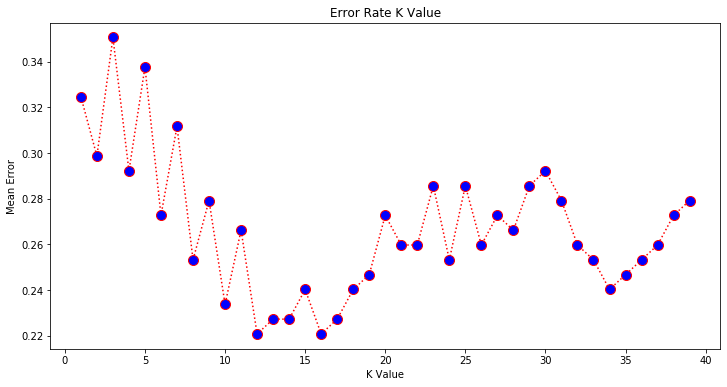

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dotted', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output we can see that the mean error is zero when the value 
of the K is between 12 and 16. We could to play around with the value of K 
to see how it impacts the accuracy of the predictions.